In [1]:
#this program will do the photometry on the reference frame to get stars 
#for the subtraction and to get stars for later

#if you use this code, please cite Oelkers & Stassun 2018

#import the relevant libraries for basic tools
import numpy as np
import scipy
from scipy import stats
import scipy.ndimage as ndimage
import astropy
from astropy.stats import sigma_clipped_stats
import math
import time
from photutils import DAOStarFinder
from photutils import aperture_photometry
from photutils import CircularAperture
from photutils import CircularAnnulus

#for reading in fits files
from astropy.io import fits
from astropy.wcs import WCS

#import relevant libraries for a list
import glob, os
from os import listdir
from os.path import isfile, join, exists
%matplotlib inline                           
%config InlineBackend.figure_format='retina'      
from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))
import matplotlib.pylab as plt                     
plt.rcParams['figure.figsize'] = (14.0, 14.0)    

## Here I only study one skygroup

In [2]:
###BEGIN UPDATE#####
skygroup = 1
#useful directories
cdedir = '/home/usuario/dia_kepler/mychanges/Python/' #code directory
caldir = '/home/usuario/Documents/Mestrado/FFIs/testeall/clean/masters/season0/' # directory to output the flux files and location of master frame
clndir = '/home/usuario/Documents/Mestrado/FFIs/testeall/clean/'#directory with the cleaned images
##END UPDATE####

#read in the master frame
mast, mheader = fits.getdata(caldir+str(skygroup)+'.fits', header = True)

In [3]:
# import pandas as pd
# file = "/home/usuario/Documents/Mestrado/FFIs/allffi_cut/clean/masters/kic_ct_join_12142009.txt"
# kic = pd.read_csv(file,sep='|',header=[0])

In [49]:
# kic2 = kic.loc[:,['kic_kepler_id','kic_ra','kic_degree_ra','kic_dec','kic_kepmag','kct_sky_group_id_value','kct_num_season_onCCD','kic_variable','kic_umag', 'kic_gmag', 'kic_rmag', 'kic_imag', 'kic_zmag','kic_gredmag','kic_d51mag', 'kic_jmag', 'kic_hmag', 'kic_kmag']]
# kic2 = kic.loc[:,['kic_kepler_id','kic_ra','kic_degree_ra','kic_dec','kic_kepmag','kct_sky_group_id_value','kct_num_season_onCCD','kic_variable','kic_galaxy','kct_module_season_0_value','kct_module_season_1_value','kct_module_season_2_value','kct_module_season_3_value','kct_output_season_0_value','kct_output_season_1_value', 'kct_output_season_2_value','kct_output_season_3_value']]
# kic2.to_csv("/home/usuario/Documents/Mestrado/FFIs/allffi_cut/clean/masters/kic_cut.csv")

NameError: name 'kic' is not defined

In [8]:
'''kic.columns = 'kic_kepler_id', 'kic_ra', 'kic_dec', 'kic_pmra', 'kic_pmdec',
       'kic_umag', 'kic_gmag', 'kic_rmag', 'kic_imag', 'kic_zmag',
       'kic_gredmag', 'kic_d51mag', 'kic_jmag', 'kic_hmag', 'kic_kmag',
       'kic_kepmag', 'kic_tmid', 'kic_scpid', 'kic_altid', 'kic_altsource',
       'kic_galaxy', 'kic_blend', 'kic_variable', 'kic_teff', 'kic_logg',
       'kic_feh', 'kic_ebminusv', 'kic_av', 'kic_radius', 'kic_cq', 'kic_pq',
       'kic_aq', 'kic_catkey', 'kic_scpkey', 'kic_parallax', 'kic_glon',
       'kic_glat', 'kic_pmtotal', 'kic_grcolor', 'kic_jkcolor', 'kic_gkcolor',
       'kic_degree_ra', 'kic_tm_designation', 'kct_sky_group_id_value',
       'kct_crowding_value', 'kct_channel_season_0_value',
       'kct_channel_season_1_value', 'kct_channel_season_2_value',
       'kct_channel_season_3_value', 'kct_column_season_0_value',
       'kct_column_season_1_value', 'kct_column_season_2_value',
       'kct_column_season_3_value', 'kct_module_season_0_value',
       'kct_module_season_1_value', 'kct_module_season_2_value',
       'kct_module_season_3_value', 'kct_output_season_0_value',
       'kct_output_season_1_value', 'kct_output_season_2_value',
       'kct_output_season_3_value', 'kct_row_season_0_value',
       'kct_row_season_1_value', 'kct_row_season_2_value',
       'kct_row_season_3_value', 'kct_ktc_flag', 'kct_distance_0',
       'kct_distance_1', 'kct_distance_2', 'kct_distance_3',
       'kct_num_season_onCCD', 'kct_contamination'],
      dtype='object' '''

"kic.columns = 'kic_kepler_id', 'kic_ra', 'kic_dec', 'kic_pmra', 'kic_pmdec',\n       'kic_umag', 'kic_gmag', 'kic_rmag', 'kic_imag', 'kic_zmag',\n       'kic_gredmag', 'kic_d51mag', 'kic_jmag', 'kic_hmag', 'kic_kmag',\n       'kic_kepmag', 'kic_tmid', 'kic_scpid', 'kic_altid', 'kic_altsource',\n       'kic_galaxy', 'kic_blend', 'kic_variable', 'kic_teff', 'kic_logg',\n       'kic_feh', 'kic_ebminusv', 'kic_av', 'kic_radius', 'kic_cq', 'kic_pq',\n       'kic_aq', 'kic_catkey', 'kic_scpkey', 'kic_parallax', 'kic_glon',\n       'kic_glat', 'kic_pmtotal', 'kic_grcolor', 'kic_jkcolor', 'kic_gkcolor',\n       'kic_degree_ra', 'kic_tm_designation', 'kct_sky_group_id_value',\n       'kct_crowding_value', 'kct_channel_season_0_value',\n       'kct_channel_season_1_value', 'kct_channel_season_2_value',\n       'kct_channel_season_3_value', 'kct_column_season_0_value',\n       'kct_column_season_1_value', 'kct_column_season_2_value',\n       'kct_column_season_3_value', 'kct_module_season_0_valu

## Here I upload all the data without differentiating between skygroups and seasons

In [4]:
#usar esse e nao os outros

import pandas as pd
file = "/home/usuario/Documents/Mestrado/FFIs/testeall/clean/masters/kic_cut.csv"
kic2 = pd.read_csv(file,sep=',',header=[0])

In [5]:
kic2

,Unnamed: 0,kic_kepler_id,kic_ra,kic_degree_ra,kic_dec,kic_kepmag,kct_sky_group_id_value,kct_num_season_onCCD,kic_variable,kct_distance_0,...,kic_umag,kic_gmag,kic_rmag,kic_imag,kic_zmag,kic_gredmag,kic_d51mag,kic_jmag,kic_hmag,kic_kmag
0,0,482249,19.388891,290.83337,36.397827,18.181000,84.0,0,0,NaN,...,NaN,19.009001,18.174000,17.823999,NaN,NaN,NaN,16.245001,15.734000,15.259000
1,1,482258,19.389015,290.83524,36.398258,19.591999,84.0,0,0,NaN,...,NaN,20.358000,19.580000,19.260000,NaN,NaN,NaN,NaN,NaN,NaN
2,2,482260,19.389038,290.83557,36.394833,17.438999,84.0,0,0,NaN,...,NaN,18.509001,17.320000,16.469999,NaN,NaN,NaN,15.827000,15.271000,14.898000
3,3,482262,19.389044,290.83563,36.399788,19.788000,84.0,0,0,NaN,...,NaN,20.212999,19.737000,19.601000,NaN,NaN,NaN,NaN,NaN,NaN
4,4,482264,19.389071,290.83603,36.396782,19.632000,84.0,0,0,NaN,...,NaN,20.153000,19.591000,19.403000,NaN,NaN,NaN,NaN,NaN,NaN
5,5,482267,19.389206,290.83807,36.393600,17.978001,84.0,0,0,NaN,...,NaN,18.542999,17.926001,17.736000,17.621000,NaN,18.285000,16.785000,15.699000,15.528000
6,6,482292,19.389481,290.84222,36.391834,19.787001,84.0,0,0,NaN,...,NaN,20.561001,19.766001,19.457001,NaN,NaN,NaN,NaN,NaN,NaN
7,7,482296,19.389601,290.84402,36.397099,17.117001,84.0,0,0,NaN,...,NaN,17.663000,17.112000,16.882999,16.806999,NaN,17.441999,15.592000,15.448000,15.057000
8,8,482297,19.389610,290.84415,36.394718,17.912001,84.0,0,0,NaN,...,NaN,18.476000,17.832001,17.670000,17.653000,NaN,18.228001,16.601999,16.292000,15.980000
9,9,482308,19.389790,290.84686,36.385712,18.966999,84.0,0,0,NaN,...,NaN,19.812000,18.962999,18.601000,NaN,NaN,NaN,16.773001,15.902000,15.795000


In [6]:
kic_sem_mag = kic2[(kic2.kic_kepmag.isna()) & (kic2.kct_num_season_onCCD!=0)]
kic_com_mag = kic2[(kic2.kic_kepmag.notna()) & (kic2.kct_num_season_onCCD!=0)]
kic_visto = kic2[(kic2.kct_num_season_onCCD!=0)]
len(kic_visto)

4451462

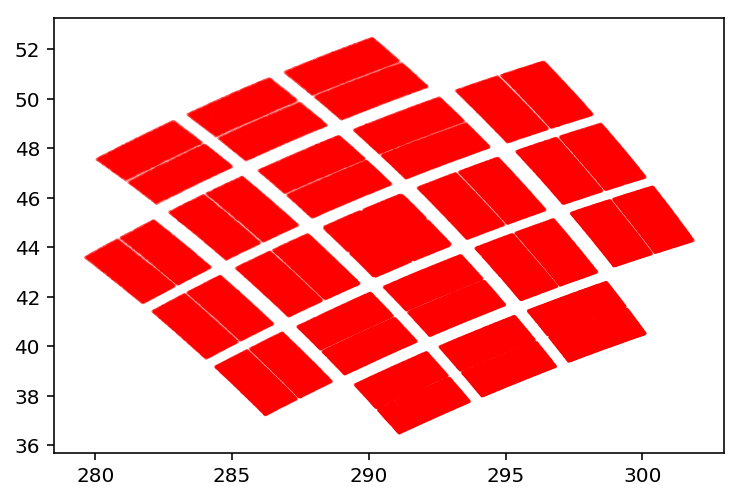

In [7]:
import matplotlib.pyplot as plt
plt.plot(kic_visto.kic_degree_ra,kic_visto.kic_dec, 'ro', markersize=0.01, fillstyle='none')
plt.show()

## Here I define a cut for a specific skygroup

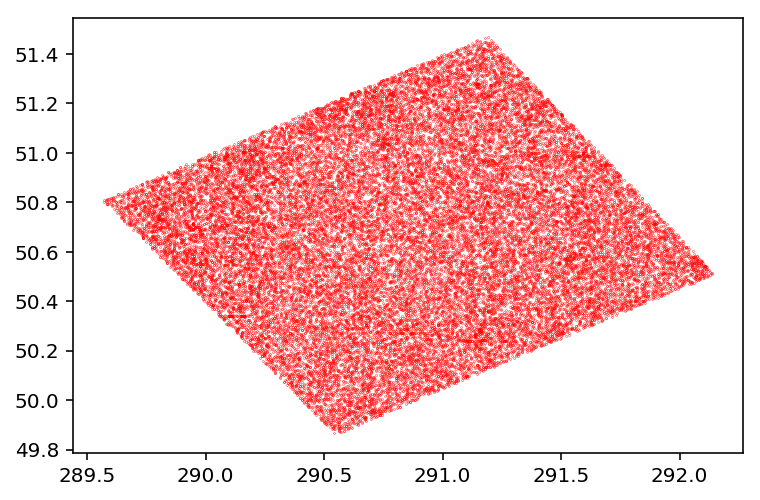

In [8]:
kic_visto_1 = kic_visto[(kic_visto.kct_sky_group_id_value==1)]
plt.plot(kic_visto_1.kic_degree_ra,kic_visto_1.kic_dec, 'ro', markersize=0.2, fillstyle='none')
plt.show()

In [9]:
kic_visto_1

,Unnamed: 0,kic_kepler_id,kic_ra,kic_degree_ra,kic_dec,kic_kepmag,kct_sky_group_id_value,kct_num_season_onCCD,kic_variable,kct_distance_0,...,kic_umag,kic_gmag,kic_rmag,kic_imag,kic_zmag,kic_gredmag,kic_d51mag,kic_jmag,kic_hmag,kic_kmag
6173046,6173046,11710437,19.368284,290.52426,49.892181,17.091999,1.0,4,0,9.0,...,NaN,17.806999,17.004000,16.785000,16.455000,NaN,17.533001,15.542000,15.289000,14.880000
6173058,6173058,11710449,19.368917,290.53375,49.882557,18.825001,1.0,4,0,9.0,...,NaN,18.579000,18.757999,18.910000,NaN,NaN,NaN,NaN,NaN,NaN
6173059,6173059,11710450,19.368963,290.53445,49.895321,17.538000,1.0,4,0,15.0,...,NaN,NaN,17.489000,17.348000,17.188999,NaN,17.778000,16.422001,15.682000,16.858999
6173063,6173063,11710454,19.369066,290.53598,49.889660,17.195999,1.0,4,0,13.0,...,NaN,17.691999,17.132999,16.983999,16.997000,NaN,17.469999,15.862000,15.567000,15.224000
6173064,6173064,11710455,19.369143,290.53714,49.886436,17.694000,1.0,4,0,12.0,...,NaN,18.750000,17.684000,17.232000,NaN,NaN,NaN,15.325000,14.742000,14.699000
6173066,6173066,11710457,19.369242,290.53864,49.893162,17.563000,1.0,4,0,16.0,...,NaN,NaN,17.517000,17.292999,17.285000,NaN,17.934999,16.336000,15.656000,15.180000
6173070,6173070,11710461,19.369385,290.54077,49.883270,18.042999,1.0,4,0,12.0,...,NaN,18.728001,18.018000,17.737000,NaN,NaN,NaN,NaN,NaN,NaN
6173071,6173071,11710462,19.369392,290.54089,49.896439,12.502000,1.0,4,0,19.0,...,NaN,12.575000,12.477000,12.509000,12.569000,NaN,12.505000,11.814000,11.631000,11.617000
6173074,6173074,11710465,19.369434,290.54150,49.868408,15.470000,1.0,4,0,3.0,...,NaN,15.733000,15.416000,15.357000,15.396000,NaN,15.572000,14.593000,14.311000,14.323000
6173081,6173081,11710472,19.369770,290.54657,49.894138,18.179001,1.0,4,0,21.0,...,NaN,19.204000,18.170000,17.729000,NaN,NaN,NaN,16.270000,15.573000,15.121000


In [13]:
def coord_min(x,y,xs,ys):
    array=[]
    sigmax = np.std(xs)
    sigmay = np.std(ys)
    for i in range(len(xs)):
        if abs(x - xs[i])<sigmax and abs(y - ys[i])<sigmay:
            array.append([xs[i],ys[i]])
    return array

In [14]:
a = np.array(kic_visto_1.kic_degree_ra)
b = np.array(kic_visto_1.kic_dec)
#coord_min(282.06316,44.358425,a,b)

[]

In [73]:
c=[]
for i in range(len(a)):
    
    c.append(abs(282.06316 - a[i]))
    #print(abs(282.06293 - a[i]))
c

[8.461100000000044,
 8.470590000000016,
 8.47129000000001,
 8.472820000000013,
 8.47398000000004,
 8.475480000000005,
 8.477610000000027,
 8.477730000000008,
 8.478340000000003,
 8.483410000000106,
 8.483720000000005,
 8.496039999999994,
 8.496680000000026,
 8.499400000000037,
 8.499800000000107,
 8.499830000000031,
 8.500230000000045,
 8.501570000000015,
 8.501630000000034,
 8.501660000000015,
 8.502700000000004,
 8.504220000000032,
 8.505440000000021,
 8.506020000000035,
 8.507030000000043,
 8.510140000000035,
 8.51585,
 8.519820000000038,
 8.52118999999999,
 8.521219999999914,
 8.522289999999998,
 8.52933999999999,
 8.529980000000023,
 8.530470000000037,
 8.531110000000012,
 8.53782000000001,
 8.539200000000108,
 8.541480000000035,
 8.543160000000114,
 8.550520000000006,
 8.556100000000015,
 8.342850000000112,
 8.352520000000027,
 8.353220000000022,
 8.360580000000027,
 8.361580000000004,
 8.36396000000002,
 8.365920000000017,
 8.366860000000031,
 8.369430000000023,
 8.3695500000000

In [17]:
len(kic_visto_1)

36003

In [15]:
a = np.array(kic_visto_1.kic_degree_ra)
print(min(a))
print(np.std(a))

289.56955
0.5522481024044713


In [80]:
##END POSSIBLE UNCOMMENT###

##POSSIBLE TO UNCOMMENT HERE IF YOU HAVE A STAR LIST###
#get the positions from the star list if one is provided ###COMMENT HERE###

#convert the ra/dec into positions
# os.chdir(caldir) #changes to the raw image directory
# files = [f for f in glob.glob("*.fits") if isfile(join(caldir, f))] #gets the relevant files with the proper extension
# files.sort()
# os.chdir(cdedir) #changes back to the code directory

#fil = caldir+'1.fits'
#clndir = '/home/usuario/Documents/Mestrado/FFIs/allffi_cut/clean/'
#fil = clndir+'teste2.fits'
# b = fits.getdata(fil,header=True)
# x=np.zeros((1024,1100))
# y=np.zeros((1100,1024))
# for i in range(1024):
#     x[i] = b[0][i,:]
# for j in range(1100):
#     y[j] = b[0][:,j]
# positions = (x,y)
# positions
import astropy
#caldir = '/home/usuario/Documents/Mestrado/FFIs/allffi_cut/clean/masters/season0/
fil = caldir+'new1.fits'
#get wcs from first calibrated file

a = fits.open(fil)
print(a)
print(np.shape(a[0]))
astropy.wcs.validate("/home/usuario/Documents/Mestrado/FFIs/allffi_cut/clean/masters/season0/new1.fits")

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f2744219828>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7f27884eb940>]
()
INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consiste

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]
INFO: 
             

HDU 1 (MOD.OUT 24.1):
  WCS key ' ':
    No issues.
  WCS key 'P':
    - 'unitfix' made the change 'Changed units: 'PIXEL' -> 'pixel',
      'PIXEL' -> 'pixel''.

HDU 2 (MOD.OUT 24.1):
  WCS key ' ':
    No issues.
  WCS key 'P':
    - 'unitfix' made the change 'Changed units: 'PIXEL' -> 'pixel',
      'PIXEL' -> 'pixel''.

HDU 3 (MOD.OUT 24.1):
  WCS key ' ':
    No issues.
  WCS key 'P':
    - 'unitfix' made the change 'Changed units: 'PIXEL' -> 'pixel',
      'PIXEL' -> 'pixel''.

HDU 4 (MOD.OUT 24.1):
  WCS key ' ':
    No issues.
  WCS key 'P':
    - 'unitfix' made the change 'Changed units: 'PIXEL' -> 'pixel',
      'PIXEL' -> 'pixel''.

HDU 5 (MOD.OUT 24.1):
  WCS key ' ':
    No issues.
  WCS key 'P':
    - 'unitfix' made the change 'Changed units: 'PIXEL' -> 'pixel',
      'PIXEL' -> 'pixel''.

HDU 6 (MOD.OUT 24.1):
  WCS key ' ':
    No issues.
  WCS key 'P':
    - 'unitfix' made the change 'Changed units: 'PIXEL' -> 'pixel',
      'PIXEL' -> 'pixel''.

HDU 7 (MOD.OUT 24.1):


In [95]:
#b[0]
w = WCS(a[1].header)
x, y = w.wcs_world2pix(np.array(kic_visto_1.kic_degree_ra), np.array(kic_visto_1.kic_dec),1)
#x,y = w.wcs_world2pix(290.58826701099287,38.21777639577971,1)
positions = (x, y)
print(positions)
print('######################')
# print(np.min(x),np.max(x))
# print(np.min(y),np.max(y))
##END POSSIBLE UNCOMMENT###
print(w)
print(x,y)
ra,dec = w.wcs_pix2world(541.04672,634.92768,1) 

print(np.max(x),np.max(y))

(array([ 1.09111658e+03,  1.09123053e+03,  1.08458516e+03, ...,
       -2.58680760e+00,  2.59674360e+00, -7.04263573e-02]), array([ 28.33388315,  18.01296055,  27.47168393, ..., 966.9221073 ,
       956.09152488, 949.88284193]))
######################
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN-SIP'  'DEC--TAN-SIP'  
CRVAL : 290.90733919363  50.673047825235  
CRPIX : 521.0  501.0  
PC1_1 PC1_2  : -0.0009286754504231  -0.0005979688047152  
PC2_1 PC2_2  : -0.0005984075188304  0.00092903211501763  
CDELT : 1.0  1.0  
NAXIS : 1100  1024
[ 1.09111658e+03  1.09123053e+03  1.08458516e+03 ... -2.58680760e+00
  2.59674360e+00 -7.04263573e-02] [ 28.33388315  18.01296055  27.47168393 ... 966.9221073  956.09152488
 949.88284193]
1096.1002476415304 1024.0119549966323


/home/usuario/anaconda3/lib/python3.6/site-packages/astropy/wcs/wcs.py:2723: RuntimeWarning: cdelt will be ignored since cd is present
  description.append(s.format(*self.wcs.cdelt))


In [78]:
print(np.array(kic_visto_1.kic_ra))

[19.368284 19.368917 19.368963 ... 19.416018 19.416189 19.416849]


1072.526512610827


<CircularAperture([[1061.1056 ,  490.60512]], r=225.0)>

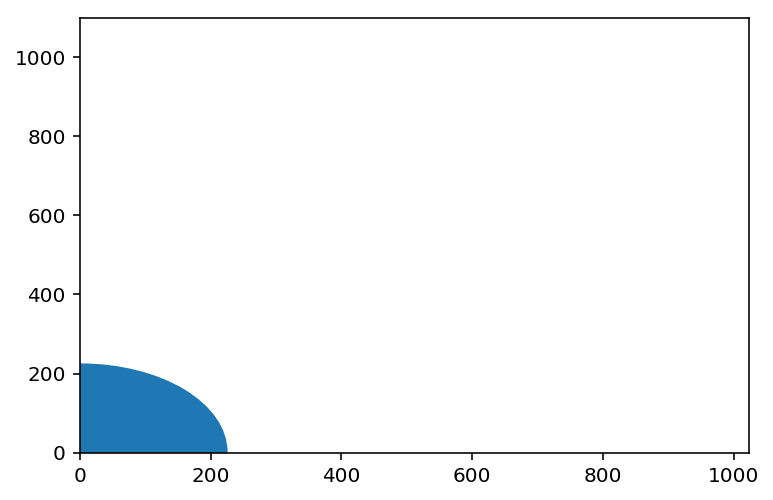

In [91]:
#11710504 	19.370987 	290.56482 	49.887646 	19.132000 	
kic_visto_1['kic_kepmag'][kic_visto_1.kic_kepler_id == 11710504]
print(w.wcs_world2pix(290.56482,49.887646,0)[0])
ra_test = kic_visto_1['kic_degree_ra'][kic_visto_1.kic_kepler_id == 11710504]
dec_test = kic_visto_1['kic_dec'][kic_visto_1.kic_kepler_id == 11710504]
radius_test = 225
apertures = CircularAperture((1061.1056,490.60512), r = radius_test)
phot_table = aperture_photometry(mast, apertures, method = 'exact')
from photutils import CircularAperture as c
c.plot(apertures,(1060,490),fill=True)
plt.xlim(0, 1024)
plt.ylim(0, 1100)
apertures

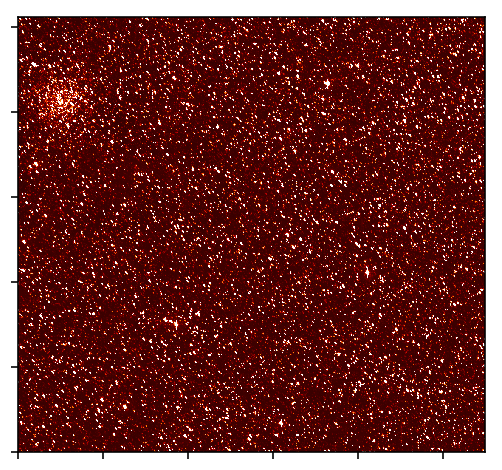

In [48]:
# Plot the image
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.imshow(a[1].data, cmap=plt.cm.gist_heat,
          origin='lower', vmin=0, vmax=1000.)

# Loop over lines of longitude
for lon in np.linspace(-180., 180., 13):
    grid_lon = np.repeat(lon, 100)
    grid_lat = np.linspace(-90., 90., 100)
    px, py = w.wcs_world2pix(grid_lon, grid_lat, 1)
    ax.plot(px, py, color='white', alpha=0.5)

# Loop over lines of latitude
for lat in np.linspace(-60., 60., 5):
    grid_lon = np.linspace(-180., 180., 100)
    grid_lat = np.repeat(lat, 100)
    px, py = w.wcs_world2pix(grid_lon, grid_lat, 1)
    ax.plot(px, py, color='white', alpha=0.5)

ax.set_xlim(0, a[1].data.shape[1])
ax.set_ylim(0, a[1].data.shape[0])
ax.set_xticklabels('')
ax.set_yticklabels('')
fig.savefig('wcs_extra.png', bbox_inches='tight')

In [19]:
phot_table

id,xcenter,ycenter,aperture_sum
,pix,pix,
int64,float64,float64,float64
1,1061.1056,490.60512,53386000.26046826


In [21]:
dec_test

6393037    50.701839
Name: kic_dec, dtype: float64

In [22]:
flx = phot_table['aperture_sum']

In [23]:
mag = 25.0-2.5*np.log10(flx)
mag

5.68143153939285


In [24]:
print('Getting the photometry on the master frame.')
#apertures to test for optimal apeture size
rads = np.arange(2,5,.25) 

#do the aperture photometry and find the optimal aperture
apertures = [CircularAperture(positions, r=r) for r in rads]
phot_table = aperture_photometry(mast, apertures, method = 'exact')
idx = 0

offset = np.zeros((len(rads),len(x)))
for ii in range(0, len(x)):
    if (x[ii] > 0) and (x[ii] < 1100) and (y[ii] > 0) and (y[ii] < 1024):
        dist = np.sqrt((x[ii]-x)**2+(y[ii]-y)**2)
        chk = np.where(dist < 6.)
        if (len(chk[0]) == 1):
            for jj in range(1, len(rads)):
                mg1 = 25.-2.5*np.log10(phot_table[ii][jj+3])
                mg0 = 25.-2.5*np.log10(phot_table[ii][jj+2])
                offset[jj,ii] = mg1-mg0
prv = 1.
opt_rad = 10.
for ii in range(0, len(rads)):
    chk = np.median(offset[ii,:])        
    if (np.abs(chk-prv) <= 0.001) and (rads[ii] < opt_rad):        
        opt_rad = rads[ii]
        print('The optimal aperture size is '+str(opt_rad)+'.')
    if (np.abs(chk-prv) > 0.001):
        prv = chk

Getting the photometry on the master frame.
The optimal aperture size is 2.25.


In [25]:
kicid = kic_visto_1.kic_kepler_id
kmag = kic_visto_1.kic_kepmag

In [26]:
#do the aperture photometry
apertures = CircularAperture(positions, r = opt_rad)
phot_table = aperture_photometry(mast, apertures, method = 'exact')

#get the background of the image
cimg, clow, chigh = scipy.stats.sigmaclip(mast, low=2.5, high = 2.5) #do a 2.5 sigma clipping
bkg_mean = np.median(cimg) #determine the sky value
sig = np.std(cimg) #determine the sigma(sky)

#convert to magnitudes
flx = phot_table['aperture_sum']-(bkg_mean*(np.pi*opt_rad**2))
flx_er = np.sqrt(phot_table['aperture_sum'])
x_pix = x
y_pix = y

#create the magnitudes from the flux
mag = 25.0-2.5*np.log10(flx)
err = (2.5/np.log(10.))*(flx_er/flx)

In [27]:
#write the magnitudes to a file
output = open(caldir+'_sky_'+str(skygroup)+'_master.ap', 'w')
for ii in range(0, len(phot_table['id'])):
    #if (x_pix[ii] > 0) and (x_pix[ii] < 1100) and (y_pix[ii] > 0) and (y_pix[ii] < 1024) and (np.isnan(mag[ii]) != 1):
    output.write(str(kicid[ii])+','+str(x_pix[ii])+','+str(y_pix[ii])+','+str(kmag[ii])+','+str(mag[ii])+','+str(err[ii])+'\n')
output.close()

#write the fluxes to a file
output = open(caldir+'_sky_'+str(skygroup)+'_master.flux', 'w')
for ii in range(0, len(phot_table['id'])):
    if (x_pix[ii] > 0) and (x_pix[ii] < 1100) and (y_pix[ii] > 0) and (y_pix[ii] < 1024) and (np.isnan(mag[ii]) != 1):
        output.write(str(kicid[ii])+','+str(x_pix[ii])+','+str(y_pix[ii])+','+str(flx[ii])+','+str(flx_er[ii])+'\n')
output.close()

#write the star list to a file
output = open(caldir+'_sky_'+str(skygroup)+'_starlist.txt', 'w')
for ii in range(0, len(phot_table['id'])):
    if (x_pix[ii] > 0) and (x_pix[ii] < 1100) and (y_pix[ii] > 0) and (y_pix[ii] < 1024) and (np.isnan(mag[ii]) != 1):
        output.write(str(kicid[ii])+','+str(x_pix[ii])+','+str(y_pix[ii])+'\n')
output.close()

KeyError: 0